In [418]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [255]:
billio_df = df[['personName','rank','age' , 'finalWorth','category','country','gender','philanthropyScore','selfMade']].copy()
billio_df.isnull().sum()

personName              0
rank                    0
age                    86
finalWorth              0
category                0
country                13
gender                 16
philanthropyScore    2272
selfMade                0
dtype: int64

In [256]:
billio_df.head()

,personName,rank,age,finalWorth,category,country,gender,philanthropyScore,selfMade
0,Elon Musk,1,50.0,219000.0,Automotive,United States,M,1.0,True
1,Jeff Bezos,2,58.0,171000.0,Technology,United States,M,1.0,True
2,Bernard Arnault & family,3,73.0,158000.0,Fashion & Retail,France,M,NaN,False
3,Bill Gates,4,66.0,129000.0,Technology,United States,M,4.0,True
4,Warren Buffett,5,91.0,118000.0,Finance & Investments,United States,M,5.0,True


# Filling all NaN in 'philanthropyScore' to 0

In [257]:
billio_df['philanthropyScore'].fillna(0 , inplace = True)
billio_df['philanthropyScore'].isnull().sum()

0

# making a grpah of final worth per country

In [258]:
plt.figure(figsize = (15,15))
country_rank = billio_df.groupby('country')[['finalWorth']].sum().reset_index()
country_rank.columns = country_rank.columns.str.strip() #removing all spaces in the columns
country_rank.sort_values('finalWorth' ,ascending = False,inplace= True)
country_rank.reset_index(drop = True)

,country,finalWorth
0,United States,4753500.0
1,China,2145250.0
2,India,723000.0
3,Germany,498900.0
4,France,454600.0
...,...,...
68,Tanzania,1500.0
69,Nepal,1500.0
70,Bahrain,1500.0
71,Greece,1400.0


<Figure size 1080x1080 with 0 Axes>

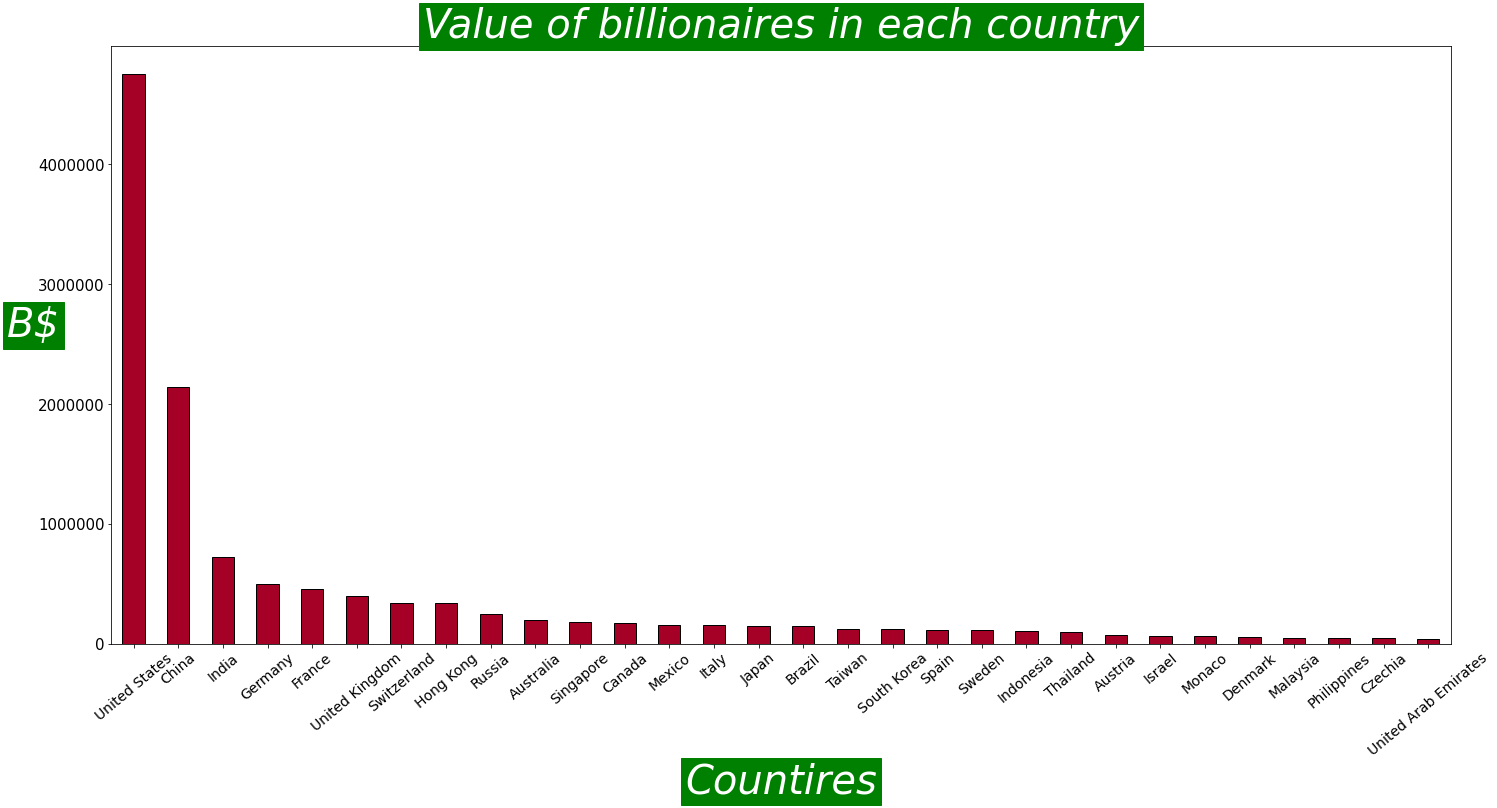

In [463]:
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', if i want to have couple of color i should use it
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = country_rank.head(30).plot(kind = 'bar' , x = 'country' , y = 'finalWorth', figsize = (24,11),rot = 40, colormap = 'RdYlGn' , legend = False, edgecolor = 'black')
plt.title('Value of billionaires in each country', fontsize = 40 , color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_xlabel('Countires',fontsize=40 ,color = 'white',fontstyle = 'italic' , backgroundcolor='green')
ax.set_ylabel('B$' , fontsize = 40, rotation = 0, color = 'white',fontstyle = 'italic' , backgroundcolor='green')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 14)
plt.show()

C:\Users\eilon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


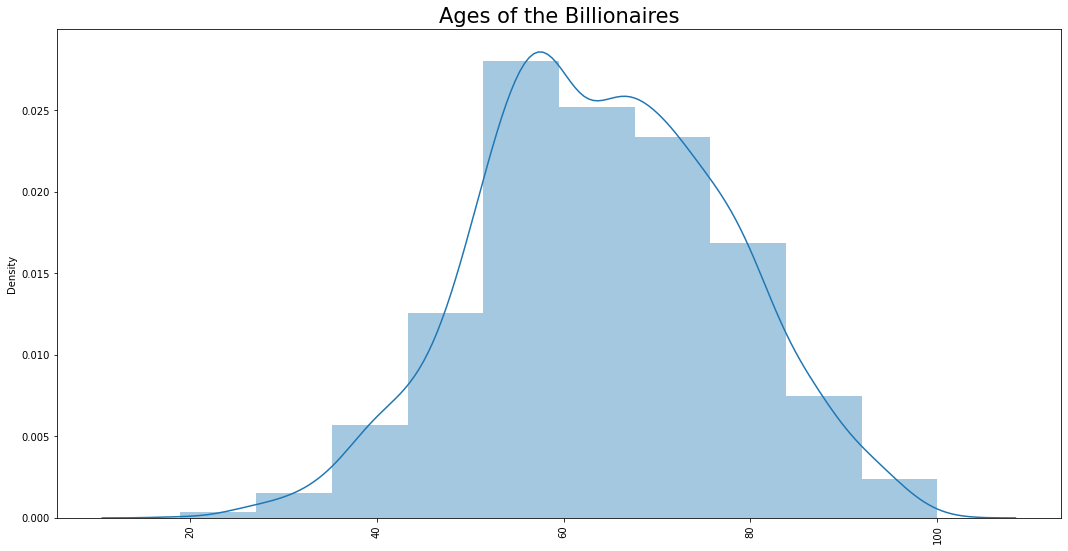

In [349]:
plt.figure(figsize =(18,9))
ax = sns.distplot(x = billio_df['age'] , bins = 10 )
# ax.set_xscale()
plt.title('Ages of the Billionaires', fontsize = 21)
plt.xticks(rotation = 90)
plt.show()

In [266]:
billio_df.loc[billio_df['country'] == 'Israel'].value_counts().sum() #we have 24 israelies billioners in the list

24

In [267]:
g=billio_df.groupby('age')[['category']].count()

In [286]:
billio_df['age'].dropna(inplace = True)
billio_df['age_group'] = billio_df['age'].copy()

for i in range (len(billio_df['age_group'])): 
    age = billio_df['age_group'][i]
    if 0<age<10:
        billio_df['age_group'][i] = '0-10'
    if 10<=age<20:
        billio_df['age_group'][i] = '10-20'
    if 20<=age<30:
        billio_df['age_group'][i] = '20-30'
    if 30<=age<40:
        billio_df['age_group'][i] = '30-40'
    if 40<=age<50:
        billio_df['age_group'][i] = '40-50'
    if 50<=age<60:
        billio_df['age_group'][i] = '50-60'
    if 60<=age<70:
        billio_df['age_group'][i] = '60-70'
    if 70<=age<80:
        billio_df['age_group'][i] = '70-80'
    if 80<=age<90:
        billio_df['age_group'][i] = '80-90'
    if 90<=age<100:
        billio_df['age_group'][i] = '90-100'
    if 100<=age<110:
        billio_df['age_group'][i] = '100-110'
    if 110<=age<120:
        billio_df['age_group'][i] = '110-120'

C:\Users\eilon\AppData\Local\Temp\ipykernel_4876\499913706.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billio_df['age_group'][i] = '50-60'


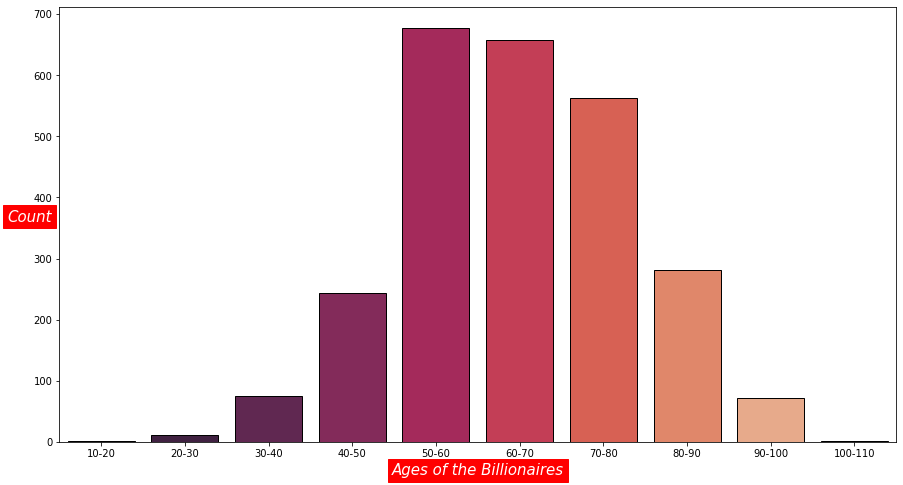

In [465]:
billio_df.sort_values('age' , ascending = True , inplace = True)
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'age_group' , data = billio_df ,palette = 'rocket' , edgecolor = 'black')
ax.set_xlabel('Ages of the Billionaires',fontsize = 15,color = 'white',fontstyle = 'italic' , backgroundcolor='red')
ax.set_ylabel('Count', fontsize = 15 ,rotation = 0 ,color = 'white',fontstyle = 'italic' , backgroundcolor='red' ) 
plt.show()